In [4]:
#Title

#### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
yelp = pd.read_csv('/Users/adam/Downloads/yelp.csv')

In [10]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [12]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


#### Creating a new column which is the number of words in the text column

In [14]:
yelp['text length'] = yelp['text'].apply(len)

In [15]:
### EDA

In [16]:
sns.set_style('white')

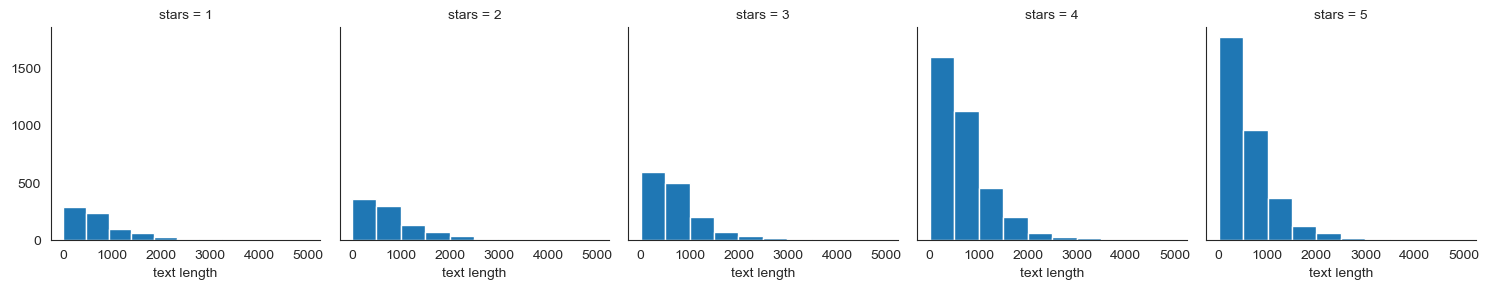

In [17]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist, 'text length')

#### Create a boxplot of text length for each star category

<Axes: xlabel='stars', ylabel='text length'>

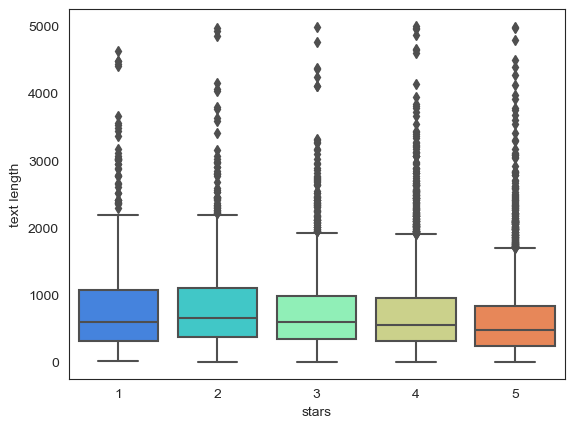

In [19]:
sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')

#### Creating a countplot of the number of occurrences for eachtype of star rating

<Axes: xlabel='stars', ylabel='count'>

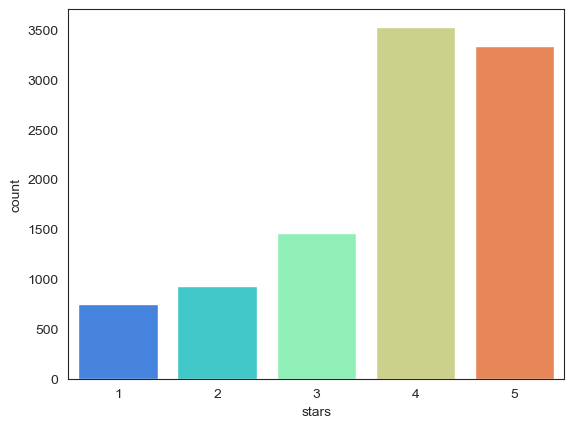

In [38]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

#### Getting mean values of numeric columns and correlation along with a heatmap

In [44]:
numeric_cols = yelp.select_dtypes(include=['int64']).columns

stars = yelp[numeric_cols].groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [48]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

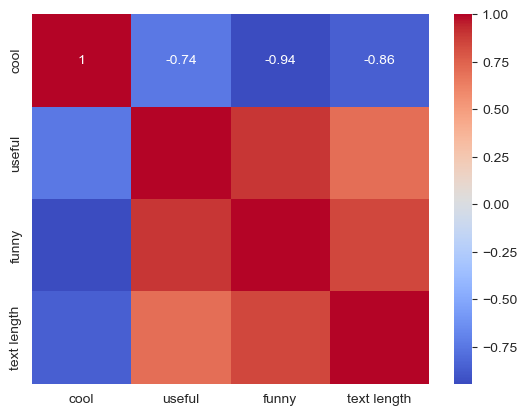

In [54]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

### NLP Classification Task

In [216]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [218]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [220]:
X = yelp_class['text']
y = yelp_class['stars']

In [222]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [224]:
X = cv.fit_transform(X)

### Train Test Split

In [228]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

#### Training model

In [234]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [236]:
nb.fit(X_train,y_train)

MultinomialNB()

#### Predictions and Evaluations

In [238]:
predictions = nb.predict(X_test)

In [240]:
from sklearn.metrics import confusion_matrix,classification_report

In [242]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



#### Using Text Processing

In [246]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [248]:
pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', MultinomialNB())])

#### Train Test Split

In [252]:
X = yelp_class['text']
y = yelp_class['stars']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [256]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

#### Predictions and Evaluations

In [260]:
predictions2 = pipe.predict(X_test)

In [286]:
from sklearn.exceptions import UndefinedMetricWarning
warnings.simplefilter("ignore", category=UndefinedMetricWarning)

print(confusion_matrix(y_test, predictions2))
print('\n')
print(classification_report(y_test, predictions2))



[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



### Conclusion
#### I've just completed an engaging project on Natural Language Processing (NLP) using Yelp review data. The journey began by importing the necessary libraries and loading the dataset into a pandas DataFrame. I performed exploratory data analysis (EDA), which included visualizing text lengths and star ratings using histograms, box plots, and count plots. This helped me understand the data distribution and identify key patterns.

#### Focusing on the one-star and five-star reviews, I converted the text data into numerical format using CountVectorizer and trained a Multinomial Naive Bayes model. The model's performance was evaluated using a confusion matrix and a classification report, achieving an impressive 90% accuracy, precision, and recall.

#### I then explored the effect of incorporating a TF-IDF transformation within a pipeline. Surprisingly, adding TF-IDF did not enhance the model's performance, suggesting that a simple bag-of-words approach was effective for this dataset.

#### This project was a valuable exercise in applying NLP techniques to real-world data. It demonstrated how to preprocess text data, train a machine learning model, and evaluate its performance. Moreover, it highlighted the importance of experimentation, as not every sophisticated method necessarily improves the results.

#### I'm excited about the insights gained and look forward to applying these techniques to more complex NLP tasks. For anyone interested, I encourage you to experiment further with feature engineering, custom analyzers, and different classifiers to see if you can improve the model's performance even more.